In [3]:
import numpy as np

In [42]:
num_samples = 5
num_features = 5

np.random.seed(18)
X = np.random.normal(1, 2, (num_samples, num_features))

In [43]:
sq_diffs = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis = -1)
sigma = 2
Z = np.exp(-sq_diffs / (2 * sigma ** 2))

In [44]:
K = 3
sorted = np.sort(Z)[:, ::-1]
W = sorted[:, 0:K]

In [45]:
np.random.seed(14)
y = np.random.rand(5, 5)

P = np.exp(W) / np.sum(W[:, np.newaxis, :], axis = -1)

In [10]:
U1, S1, Vt1 = np.linalg.svd(X)

In [11]:
U2, S2, Vt2 = np.linalg.svd(X.T * X)

In [61]:
vals = (S1 ** -2) * (Vt1.T @ Vt1) * y
close_to_0 = np.isclose(vals, 0, 1e-8)
theta = np.sum(vals[close_to_0])

In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df = df.dropna()

In [ ]:
df = df.replace({"male", "female"}, {0, 1})

In [ ]:
df['Sex_Male'] = (df['Sex'] == 0)
df['Sex_Female'] = (df['Sex'] == 1)

In [ ]:
df = df.drop('Sex', axis = 1)

Text(0, 0.5, 'Frequency')

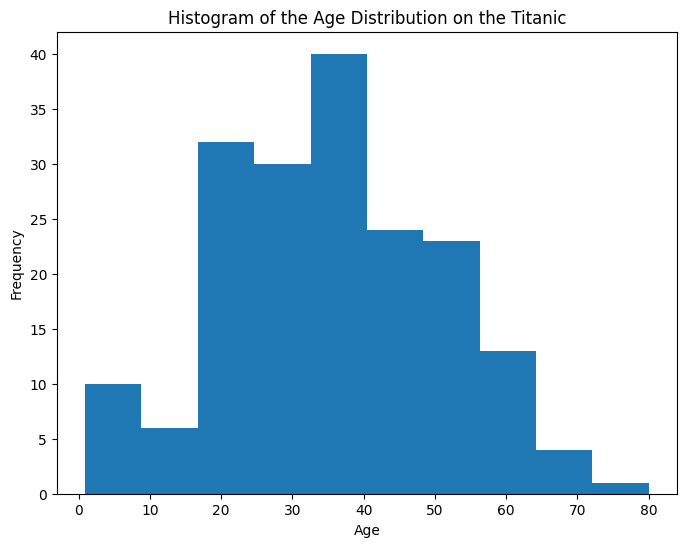

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))
plt.hist(df['Age'], 10)
plt.title("Histogram of the Age Distribution on the Titanic")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Age')

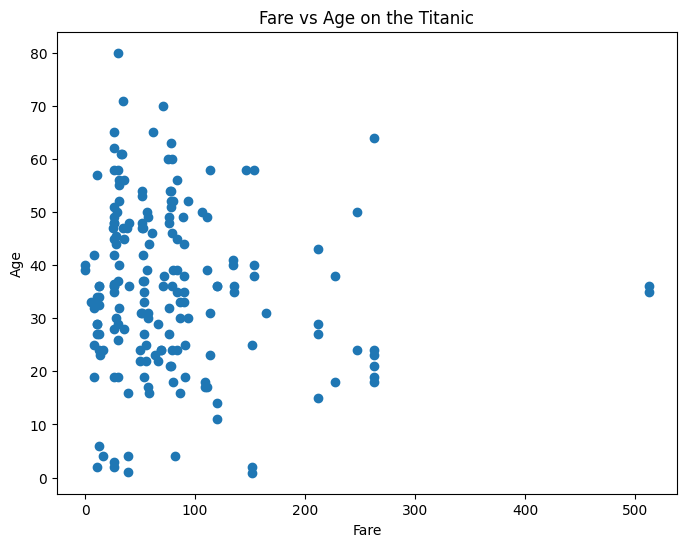

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(df["Fare"], df['Age'])
plt.title("Fare vs Age on the Titanic")
plt.xlabel("Fare")
plt.ylabel("Age")